# Assignment Part 1

### 1.1. Complete the implementation of the Perceptron


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from scipy.stats import truncnorm

#### Loading and processing data

In [2]:
train_data=np.loadtxt("data/assignment/overhead_mnist_train.csv",delimiter=",")
test_data=np.loadtxt("data/assignment/overhead_mnist_test.csv",delimiter=",")

In [3]:
train_data.shape

(68152, 785)

In [4]:
X_train=train_data[:,1:]
y_train=train_data[:,0]
X_test=test_data[:,1:]
y_test=test_data[:,0]

In [5]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((68152, 784), (8520, 784), (68152,), (8520,))

In [6]:
X_train.max(),X_test.max()

(255.0, 255.0)

In [7]:
normalization_factor=0.99/X_train.max()

In [8]:
X_train=X_train * normalization_factor + 0.01
X_test=X_test * normalization_factor + 0.01

In [9]:
# Encoding labels for single perceptron Label 7 binary classification

In [10]:
class_7_train_data=(7==y_train).astype(float)
class_7_test_data=(7==y_test).astype(float)

#### Shuffling training and test data

In [11]:
shuffler_train = np.arange(X_train.shape[0])
np.random.shuffle(shuffler_train)

shuffler_test = np.arange(X_test.shape[0])
np.random.shuffle(shuffler_test)

X_train_shuffled = X_train[shuffler_train]
y_train_shuffled = y_train[shuffler_train]

X_test_shuffled=X_test[shuffler_test]
y_test_shuffled=y_test[shuffler_test]

In [12]:
class Perceptron(object):

    #==========================================#
    # The init method is called when an object #
    # is created. It can be used to initialize #
    # the attributes of the class.             #
    #==========================================#
    def __init__(self, no_inputs, max_iterations=20, learning_rate=0.1, activation="step"):
        self.no_inputs = no_inputs
        self.weights = np.ones(no_inputs) / no_inputs 
        self.max_iter = max_iterations
        self.learning_rate = learning_rate
        self.activation = activation

    #=======================================#
    # Prints the details of the perceptron. #
    #=======================================#
    def print_details(self):
        print("No. inputs:\t" + str(self.no_inputs))
        print("Max iterations:\t" + str(self.max_iter))
        print("Learning rate:\t" + str(self.learning_rate))

    def activate_sigmoid(self, a):
        
        o=1/(1+np.e**(-a))
        return o
    
    def activate_step(self, a):
        
        
        o=np.where(a>=0.0,1,0)
        return o
    
    #=========================================#
    # Performs feed-forward prediction on one #
    # set of inputs.                          #
    #=========================================#
    
    def do_predict(self, X):
        
        
        self.input_weights=self.weights[1:]
        self.bias=self.weights[0]
        weighted_sum=np.dot(X,self.input_weights)+self.bias
        output=self.activate_step(weighted_sum)
        
        return output

    #======================================#
    # Trains the perceptron using labelled #
    # training data.                       #
    #======================================#
    
    def do_train_online(self, training_data, labels):
        assert len(training_data) == len(labels) # Ensure the training data and labels have the same length
        
        # Generate a sequence of indices the same length as the training data and shuffles to make model more robust 
        shuffler = np.arange(training_data.shape[0]) 
        np.random.shuffle(shuffler)
        training_data_shuffled = training_data[shuffler]
        labels_shuffled = labels[shuffler]
        
        # Initialize a list to keep track of weight and bias updates at each iteration
        weight_bias_updates=[]
        
        # Iterate over the training process for a set number of iterations (epochs)
        for iter in range(self.max_iter):
        
            for i in range(len(training_data_shuffled)):

                predicted=self.do_predict(training_data_shuffled[i])
                
                input_vector=training_data_shuffled[i]
                
                target_vector=labels_shuffled[i]
                
                error=target_vector-predicted
                
                weight_update_value=self.learning_rate*error*input_vector
                
                bias_update_value=self.learning_rate*error*1
                
                self.input_weights+=weight_update_value
                
                self.bias+=bias_update_value
                
            # At the end of each iteration, save a copy of the current weights and bias
            weight_bias_updates.append((self.input_weights.copy(),self.bias.copy()))
        
        return weight_bias_updates

    #=========================================#
    # Tests the prediction on each element of #
    # the testing data. Prints the precision, #
    # recall, and accuracy of the perceptron. #
    #=========================================#
    def test(self, testing_data, labels):
        
        assert len(testing_data) == len(labels)
        
        
        correct_predictions,wrong_predictions=0,0
        
        confusion_matrix=np.zeros((2,2),int)
        
        for i in range(len(testing_data)):
            
            predicted_label=int(self.do_predict(testing_data[i]))
            
            actual_label=int(labels[i])
            
            confusion_matrix[actual_label,predicted_label]+=1
            
            if predicted_label==actual_label:
                correct_predictions+=1  
            else:
                wrong_predictions+=1
                
        accuracy=correct_predictions/len(testing_data)
        
        true_positives=confusion_matrix[0,0]+confusion_matrix[1,1]
        false_positives=confusion_matrix[0,1]
        false_negatives=confusion_matrix[1,0]
        
        precision=true_positives/(true_positives+false_positives)
        recall=true_positives/(true_positives+false_negatives)
      
        print("Accuracy:\t"+str(accuracy))
        print("Precision:\t"+str(precision))
        print("Recall:\t"+str(recall))
        print("confusion matrix:")
        print(confusion_matrix)
        return (accuracy,precision,recall)

In [13]:
p = Perceptron(28*28+1)
p.print_details()

No. inputs:	785
Max iterations:	20
Learning rate:	0.1


In [14]:
weights_step_online=p.do_train_online(X_train,class_7_train_data)

In [15]:
results_step_online=p.test(X_test,class_7_test_data)

Accuracy:	0.9171361502347418
Precision:	0.9567772743969634
Recall:	0.9567772743969634
confusion matrix:
[[7279  353]
 [ 353  535]]


### Updating Step Function Perceptron for Batch Learning

In [49]:
class Perceptron(object):

    #==========================================#
    # The init method is called when an object #
    # is created. It can be used to initialize #
    # the attributes of the class.             #
    #==========================================#
    def __init__(self, no_inputs, max_iterations=20, learning_rate=0.1, activation="step"):
        self.no_inputs = no_inputs
        self.weights = np.ones(no_inputs) / no_inputs 
        self.max_iter = max_iterations
        self.learning_rate = learning_rate
        self.activation = activation

    #=======================================#
    # Prints the details of the perceptron. #
    #=======================================#
    def print_details(self):
        print("No. inputs:\t" + str(self.no_inputs))
        print("Max iterations:\t" + str(self.max_iter))
        print("Learning rate:\t" + str(self.learning_rate))

    def activate_sigmoid(self, a):
        
        o=1/(1+np.e**(-a))
        return o
    
    def activate_step(self, a):
       
        
        o=np.where(a>=0.0,1,0)
        return o
    
    #=========================================#
    # Performs feed-forward prediction on one #
    # set of inputs.                          #
    #=========================================#
    
    def do_predict(self, X):
       
        self.input_weights=self.weights[1:]
        self.bias=self.weights[0]
        weighted_sum=np.dot(X,self.input_weights)+self.bias
        output=self.activate_step(weighted_sum)
        
        return output

    #======================================#
    # Trains the perceptron using labelled #
    # training data.                       #
    #======================================#
    

    def do_train_batch(self, training_data, labels, batch_size=32):
        
        assert len(training_data) == len(labels)
        # Shuffling data
        shuffler = np.arange(training_data.shape[0])
        np.random.shuffle(shuffler)
        training_data_shuffled = training_data[shuffler]
        labels_shuffled = labels[shuffler]

        for iter in range(self.max_iter):
            # Iterate over batches
            for batch_start in range(0, len(training_data_shuffled), batch_size):
                batch_end= min(batch_start + batch_size, len(training_data_shuffled))
                batch_data = training_data_shuffled[batch_start:batch_end]
                batch_labels = labels_shuffled[batch_start:batch_end]

                # This batch learning approach accumulate updates for each batch in the training data
                
                weight_updates = np.zeros(self.no_inputs - 1)  # excluding bias
                
                bias_update = 0

                for i in range(len(batch_data)):
                    
                    predicted = self.do_predict(batch_data[i])
                    actual_label=batch_labels[i]
                    
                    error = actual_label - predicted

                    weight_updates += self.learning_rate * error * batch_data[i]
                    bias_update += self.learning_rate * error

                # The average of the weight and bias updates across a batch are applied network to weights and bias
                
                self.input_weights += weight_updates / len(batch_data)
                self.bias += bias_update / len(batch_data)
                
    def test(self, testing_data, labels):
        
        assert len(testing_data) == len(labels)
        
        
        correct_predictions,wrong_predictions=0,0
        
        confusion_matrix=np.zeros((2,2),int)
        
        for i in range(len(testing_data)):
            
            predicted_label=self.do_predict(testing_data[i])
            
            actual_label=int(labels[i])
            
            confusion_matrix[actual_label,predicted_label]+=1
            
            if predicted_label==actual_label:
                correct_predictions+=1  
            else:
                wrong_predictions+=1
                
        accuracy=correct_predictions/len(testing_data)
        
        true_positives=confusion_matrix[0,0]+confusion_matrix[1,1]
        false_positives=confusion_matrix[0,1]
        false_negatives=confusion_matrix[1,0]
        
        precision=true_positives/(true_positives+false_positives)
        recall=true_positives/(true_positives+false_negatives)
      
        print("Accuracy:\t"+str(accuracy))
        print("Precision:\t"+str(precision))
        print("Recall:\t"+str(recall))
        print(confusion_matrix)
        
        return (accuracy,precision,recall)

In [50]:
p_batch= Perceptron(28*28+1)
p_batch.print_details()

No. inputs:	785
Max iterations:	20
Learning rate:	0.1


In [51]:
weights_step_batch=p_batch.do_train_batch(X_train,class_7_train_data)

results_step_batch=p_batch.test(X_test,class_7_test_data)

results_step_batch

Accuracy:	0.9227699530516432
Precision:	0.9953158627674389
Recall:	0.9267947660025935
[[7595   37]
 [ 621  267]]


(0.9227699530516432, 0.9953158627674389, 0.9267947660025935)

### Updating the perceptron to use the sigmoid activation function and online Learning

In [19]:
class Perceptron(object):

    #==========================================#
    # The init method is called when an object #
    # is created. It can be used to initialize #
    # the attributes of the class.             #
    #==========================================#
    def __init__(self, no_inputs, max_iterations=10, learning_rate=0.1, activation="step"):
        self.no_inputs = no_inputs
        self.weights = np.ones(no_inputs) / no_inputs 
        self.max_iter = max_iterations
        self.learning_rate = learning_rate
        self.activation = activation

    #=======================================#
    # Prints the details of the perceptron. #
    #=======================================#
    def print_details(self):
        print("No. inputs:\t" + str(self.no_inputs))
        print("Max iterations:\t" + str(self.max_iter))
        print("Learning rate:\t" + str(self.learning_rate))

    def activate_sigmoid(self, a):
       
        o=1/(1+np.e**(-a))
        return o
    
    def activate_step(self, a):
       
        o=np.where(a>=0.0,1,0)
        return o
    
    #=========================================#
    # Performs feed-forward prediction on one #
    # set of inputs.                          #
    #=========================================#
    
    def do_predict(self, X):
        # TO-DO:
        
        self.input_weights=self.weights[1:]
        self.bias=self.weights[0]
        weighted_sum=np.dot(X,self.input_weights)+self.bias
        output=self.activate_sigmoid(weighted_sum)
        
        return output

    #======================================#
    # Trains the perceptron using labelled #
    # training data.                       #
    #======================================#
    def do_train_online(self, training_data, labels):
        assert len(training_data) == len(labels)
            
        #shuffling data
        
        shuffler = np.arange(training_data.shape[0])
        np.random.shuffle(shuffler)
        training_data_shuffled = training_data[shuffler]
        labels_shuffled = labels[shuffler]
        
        weight_bias_updates=[]
        
        for iter in range(self.max_iter):
        
            for i in range(len(training_data_shuffled)):
                
                input_vector=training_data_shuffled[i]

                predicted=self.do_predict(input_vector)
                
                #input_vector=training_data_shuffled[i]
                
                target_vector=labels_shuffled[i]
                
                error=target_vector-predicted
                
                weight_update_value=self.learning_rate*error*input_vector
                
                bias_update_value=self.learning_rate*error*1
                
                self.input_weights+=weight_update_value
                
                self.bias+=bias_update_value
            
            weight_bias_updates.append((self.input_weights.copy(),self.bias.copy()))
        
        return weight_bias_updates

    #=========================================#
    # Tests the prediction on each element of #
    # the testing data. Prints the precision, #
    # recall, and accuracy of the perceptron. #
    #=========================================#
    def test(self, testing_data, labels):
        
        assert len(testing_data) == len(labels)
        
       
        correct_predictions,wrong_predictions=0,0
        
        confusion_matrix=np.zeros((2,2),int)
        
        for i in range(len(testing_data)):
            
            predicted_label=self.do_predict(testing_data[i])
            
            predicted_label=np.where(predicted_label>=0.999,1,0)
            
            actual_label=int(labels[i])
            
            confusion_matrix[actual_label,predicted_label]+=1
            
            if predicted_label==actual_label:
                correct_predictions+=1  
            else:
                wrong_predictions+=1
                
        accuracy=correct_predictions/len(testing_data)
        
        true_positives=confusion_matrix[0,0]+confusion_matrix[1,1]
        false_positives=confusion_matrix[0,1]
        false_negatives=confusion_matrix[1,0]
        
        precision=true_positives/(true_positives+false_positives)
        recall=true_positives/(true_positives+false_negatives)
      
        print("Accuracy:\t"+str(accuracy))
        print("Precision:\t"+str(precision))
        print("Recall:\t"+str(recall))
        print(confusion_matrix)
        
        return (accuracy,precision,recall)

In [20]:
sigmoid_online= Perceptron(28*28+1)
sigmoid_online.print_details()

No. inputs:	785
Max iterations:	10
Learning rate:	0.1


In [21]:
weights_sigmoid_online=sigmoid_online.do_train_online(X_train,class_7_train_data)

results_sigmoid_online=sigmoid_online.test(X_test,class_7_test_data)

results_sigmoid_online

Accuracy:	0.9269953051643193
Precision:	0.9935840986287583
Recall:	0.9325776360845436
[[7581   51]
 [ 571  317]]


(0.9269953051643193, 0.9935840986287583, 0.9325776360845436)

### Updating the perceptron to use the sigmoid activation function and Batch Learning

In [22]:
class Perceptron(object):

    #==========================================#
    # The init method is called when an object #
    # is created. It can be used to initialize #
    # the attributes of the class.             #
    #==========================================#
    def __init__(self, no_inputs, max_iterations=20, learning_rate=0.1, activation="step"):
        self.no_inputs = no_inputs
        self.weights = np.ones(no_inputs) / no_inputs 
        self.max_iter = max_iterations
        self.learning_rate = learning_rate
        self.activation = activation

    #=======================================#
    # Prints the details of the perceptron. #
    #=======================================#
    def print_details(self):
        print("No. inputs:\t" + str(self.no_inputs))
        print("Max iterations:\t" + str(self.max_iter))
        print("Learning rate:\t" + str(self.learning_rate))

    def activate_sigmoid(self, a):
       
        o=1/(1+np.e**(-a))
        return o
    
    def activate_step(self, a):
       
        
        o=np.where(a>=0.0,1,0)
        return o
    
    #=========================================#
    # Performs feed-forward prediction on one #
    # set of inputs.                          #
    #=========================================#
    
    def do_predict(self, X):
        
        
        self.input_weights=self.weights[1:]
        self.bias=self.weights[0]
        weighted_sum=np.dot(X,self.input_weights)+self.bias
        output=self.activate_sigmoid(weighted_sum)
        
        return output

    #======================================#
    # Trains the perceptron using labelled #
    # training data.                       #
    #======================================#
    

    def do_train_batch(self, training_data, labels, batch_size=64):
        assert len(training_data) == len(labels)
        # Shuffling data
        shuffler = np.arange(training_data.shape[0])
        np.random.shuffle(shuffler)
        training_data_shuffled = training_data[shuffler]
        labels_shuffled = labels[shuffler]

        for iter in range(self.max_iter):
            # Iterate over batches
            for batch_start in range(0, len(training_data_shuffled), batch_size):
                batch_end= min(batch_start + batch_size, len(training_data_shuffled))
                batch_data = training_data_shuffled[batch_start:batch_end]
                batch_labels = labels_shuffled[batch_start:batch_end]

                # This batch learning approach accumulate updates for each batch in the training data
                
                weight_updates = np.zeros(self.no_inputs - 1)  # excluding bias
                
                bias_update = 0

                for i in range(len(batch_data)):
                    
                    predicted = self.do_predict(batch_data[i])
                    actual_label=batch_labels[i]
                    
                    error = actual_label - predicted

                    weight_updates += self.learning_rate * error * batch_data[i]
                    bias_update += self.learning_rate * error

                # The average of the weight and bias updates across a batch are applied network to weights and bias
                
                self.input_weights += weight_updates / len(batch_data)
                self.bias += bias_update / len(batch_data)
                
    def test(self, testing_data, labels):
        
        assert len(testing_data) == len(labels)
        
        # TO-DO:
        #accuracy = 0.0
        #precision = 0.0
        #recall = 0.0
        correct_predictions,wrong_predictions=0,0
        
        confusion_matrix=np.zeros((2,2),int)
        
        for i in range(len(testing_data)):
            
            predicted_label=self.do_predict(testing_data[i])
            
            predicted_label=np.where(predicted_label>=0.999,1,0)
            
            actual_label=int(labels[i])
            
            confusion_matrix[actual_label,predicted_label]+=1
            
            if predicted_label==actual_label:
                correct_predictions+=1  
            else:
                wrong_predictions+=1
                
        accuracy=correct_predictions/len(testing_data)
        
        true_positives=confusion_matrix[0,0]+confusion_matrix[1,1]
        false_positives=confusion_matrix[0,1]
        false_negatives=confusion_matrix[1,0]
        
        precision=true_positives/(true_positives+false_positives)
        recall=true_positives/(true_positives+false_negatives)
      
        print("Accuracy:\t"+str(accuracy))
        print("Precision:\t"+str(precision))
        print("Recall:\t"+str(recall))
        print(confusion_matrix)
        
        return (accuracy,precision,recall)

In [23]:
sigmoid_batch = Perceptron(28*28+1)
sigmoid_batch.print_details()

No. inputs:	785
Max iterations:	20
Learning rate:	0.1


In [24]:
weights_sigmoid_batch=sigmoid_batch.do_train_batch(X_train,class_7_train_data)

results_sigmoid_batch=sigmoid_batch.test(X_test,class_7_test_data)

results_sigmoid_batch

Accuracy:	0.8987089201877935
Precision:	1.0
Recall:	0.8987089201877935
[[7632    0]
 [ 863   25]]


(0.8987089201877935, 1.0, 0.8987089201877935)

## 1.4. Use multiple batch-learning step-activation perceptrons to classify every dataset type 

#### Version A: Creating 10 invididual step-activation perceptrons to classify every dataset type 

In [25]:
#create label-encoded data for every class

In [26]:
y_train_full=train_data[:,0]
y_test_full=test_data[:,0]

In [27]:
#Encoding for every class
class_0_train=(0==y_train_full).astype(float)
class_0_test=(0==y_test_full).astype(float)

class_1_train=(1==y_train_full).astype(float)
class_1_test=(1==y_test_full).astype(float)

class_2_train=(2==y_train_full).astype(float)
class_2_test=(2==y_test_full).astype(float)

class_3_train=(3==y_train_full).astype(float)
class_3_test=(3==y_test_full).astype(float)

class_4_train=(4==y_train_full).astype(float)
class_4_test=(4==y_test_full).astype(float)

class_5_train=(5==y_train_full).astype(float)
class_5_test=(5==y_test_full).astype(float)

class_6_train=(6==y_train_full).astype(float)
class_6_test=(6==y_test_full).astype(float)

class_8_train=(8==y_train_full).astype(float)
class_8_test=(8==y_test_full).astype(float)

class_9_train=(9==y_train_full).astype(float)
class_9_test=(9==y_test_full).astype(float)

In [28]:
class Perceptron_Step(object):

    #==========================================#
    # The init method is called when an object #
    # is created. It can be used to initialize #
    # the attributes of the class.             #
    #==========================================#
    def __init__(self, no_inputs, max_iterations=20, learning_rate=0.1, activation="step"):
        self.no_inputs = no_inputs
        self.weights = np.ones(no_inputs) / no_inputs 
        self.max_iter = max_iterations
        self.learning_rate = learning_rate
        self.activation = activation

    #=======================================#
    # Prints the details of the perceptron. #
    #=======================================#
    def print_details(self):
        print("No. inputs:\t" + str(self.no_inputs))
        print("Max iterations:\t" + str(self.max_iter))
        print("Learning rate:\t" + str(self.learning_rate))

    def activate_sigmoid(self, a):
        # TO-DO: implement sigmoid
        o=1/(1+np.e**(-a))
        return o
    
    def activate_step(self, a):
        # TO-DO: implement step
        
        o=np.where(a>=0.0,1,0)
        return o
    
    #=========================================#
    # Performs feed-forward prediction on one #
    # set of inputs.                          #
    #=========================================#
    
    def do_predict(self, X):
        # TO-DO:
        
        self.input_weights=self.weights[1:]
        self.bias=self.weights[0]
        weighted_sum=np.dot(X,self.input_weights)+self.bias
        output=self.activate_step(weighted_sum)
        
        return output

    #======================================#
    # Trains the perceptron using labelled #
    # training data.                       #
    #======================================#
    

    def do_train_batch(self, training_data, labels, batch_size=32):
        
        assert len(training_data) == len(labels)
        # Shuffling data
        shuffler = np.arange(training_data.shape[0])
        np.random.shuffle(shuffler)
        training_data_shuffled = training_data[shuffler]
        labels_shuffled = labels[shuffler]

        for iter in range(self.max_iter):
            # Iterate over batches
            for batch_start in range(0, len(training_data_shuffled), batch_size):
                batch_end= min(batch_start + batch_size, len(training_data_shuffled))
                batch_data = training_data_shuffled[batch_start:batch_end]
                batch_labels = labels_shuffled[batch_start:batch_end]

                # This batch learning approach accumulate updates for each batch in the training data
                
                weight_updates = np.zeros(self.no_inputs - 1)  # excluding bias
                
                bias_update = 0

                for i in range(len(batch_data)):
                    
                    predicted = self.do_predict(batch_data[i])
                    actual_label=batch_labels[i]
                    
                    error = actual_label - predicted

                    weight_updates += self.learning_rate * error * batch_data[i]
                    bias_update += self.learning_rate * error

                # The average of the weight and bias updates across a batch are applied network to weights and bias
                
                self.input_weights += weight_updates / len(batch_data)
                self.bias += bias_update / len(batch_data)
                
    def test(self, testing_data, labels):
        
        assert len(testing_data) == len(labels)
        
    
        correct_predictions,wrong_predictions=0,0
        
        confusion_matrix=np.zeros((2,2),int)
        
        for i in range(len(testing_data)):
            
            predicted_label=self.do_predict(testing_data[i])
            
            #predicted_label=np.where(predicted_label>=0.999,1,0)
            
            actual_label=int(labels[i])
            
            confusion_matrix[actual_label,predicted_label]+=1
            
            if predicted_label==actual_label:
                correct_predictions+=1  
            else:
                wrong_predictions+=1
                
        accuracy=correct_predictions/len(testing_data)
        
        true_positives=confusion_matrix[0,0]+confusion_matrix[1,1]
        false_positives=confusion_matrix[0,1]
        false_negatives=confusion_matrix[1,0]
        
        precision=true_positives/(true_positives+false_positives)
        recall=true_positives/(true_positives+false_negatives)
      
        print("Accuracy:\t"+str(accuracy))
        print("Precision:\t"+str(precision))
        print("Recall:\t"+str(recall))
        print(confusion_matrix)
        
        return (accuracy,precision,recall)

In [29]:
# training 10 individual perceptrons for 10 classes

class_0_perceptron=Perceptron_Step(28*28+1)
class_0_weights=class_0_perceptron.do_train_batch(X_train,class_0_train)

class_1_perceptron=Perceptron_Step(28*28+1)
class_1_weights=class_1_perceptron.do_train_batch(X_train,class_1_train)

class_2_perceptron=Perceptron_Step(28*28+1)
class_2_weights=class_2_perceptron.do_train_batch(X_train,class_2_train)

class_3_perceptron=Perceptron_Step(28*28+1)
class_3_weights=class_3_perceptron.do_train_batch(X_train,class_3_train)

class_4_perceptron=Perceptron_Step(28*28+1)
class_4_weights=class_4_perceptron.do_train_batch(X_train,class_4_train)

class_5_perceptron=Perceptron_Step(28*28+1)
class_5_weights=class_5_perceptron.do_train_batch(X_train,class_5_train)

class_6_perceptron=Perceptron_Step(28*28+1)
class_6_weights=class_6_perceptron.do_train_batch(X_train,class_6_train)

class_8_perceptron=Perceptron_Step(28*28+1)
class_8_weights=class_8_perceptron.do_train_batch(X_train,class_8_train)

class_9_perceptron=Perceptron_Step(28*28+1)
class_9_weights=class_9_perceptron.do_train_batch(X_train,class_9_train)

In [30]:
class_7_train=(7==y_train_full).astype(float)
class_7_test=(7==y_test_full).astype(float)

In [31]:
class_7_perceptron=Perceptron_Step(28*28+1)
class_7_weights=class_7_perceptron.do_train_batch(X_train,class_7_train)

In [32]:
trained_class_predictors=[class_0_perceptron,class_1_perceptron,class_2_perceptron,
                  class_3_perceptron,class_4_perceptron, class_5_perceptron,class_6_perceptron,
                 class_7_perceptron,class_8_perceptron,class_9_perceptron]

encoded_class_labels=[class_0_train,class_1_train,class_2_train,
                     class_3_train,class_4_train,class_5_train,
                     class_6_train,class_7_train,class_8_train,class_9_train]

In [33]:
for i in range(5):
        
        actual_value=int(y_test_full[i])
        
        encoded_label=encoded_class_labels[actual_value]
        
        predictor=trained_class_predictors[i]
        
        prediction=predictor.do_predict(X_test[i])
        
        encoded_value=encoded_label[i]
        
        if prediction==encoded_value:
            
            print(f"It correctly predicted the actual value from the test data: {actual_value}")
            
        else:
            print("Made a wrong prediction")
            
        print("\n")

It correctly predicted the actual value from the test data: 3


It correctly predicted the actual value from the test data: 6


It correctly predicted the actual value from the test data: 9


It correctly predicted the actual value from the test data: 8


It correctly predicted the actual value from the test data: 7




#### Version B: Create a 10-perceptron Sigmoid-Activation Neural Network to predict all classes

In [34]:
from scipy.stats import truncnorm

In [35]:
@np.vectorize
def sigmoid(x):
    return 1/(1+(np.e**(-x)))

activation_function=sigmoid

def truncated_normal(low=0,upp=1,sd=1,mean=0):

    return truncnorm ((low-mean)/sd,(upp-mean)/sd,scale=sd,loc=mean)

In [36]:
class Perceptron_10_Combined:

    def __init__ (self,no_input,no_bias,no_output,learning_rate):

        self.input=no_input
        self.bias=no_bias
        self.output=no_output
        self.learning_rate=learning_rate
        self.create_weight_matrices()


    def create_weight_matrices(self):

        bias_node=1 if self.bias else 0
        r1=1/np.sqrt(self.input+bias_node)
        X1=truncated_normal(low=-r1,upp=r1,mean=0,sd=1)
        self.wih=X1.rvs((self.output,(self.input+bias_node)))


    def train_single(self,input_vector,target_vector):

        target_vector=np.array(target_vector,ndmin=2).T

        input_vector=np.array(input_vector,ndmin=2).T

        if self.bias:

            input_vector=np.concatenate((input_vector,[[self.bias]]))

        output_z=np.dot(self.wih,input_vector)

        output_activation=activation_function(output_z)

        output_error=target_vector-output_activation

        #backpropagating

        tmp1=output_error*output_activation*(1-output_activation)

        tmp1=self.learning_rate*np.dot(tmp1,input_vector.T)

        self.wih+=tmp1


    def train_epochs(self,data_array,labels_encoded,epochs,trigger=False):

        #def train_single(self,input_vector,target_vector):
        self.weight_updates=[]

        for epoch in range(epochs):

            for i in range(len(data_array)):

                self.train_single(data_array[i],labels_encoded[i])

            if trigger:

                self.weight_updates.append(self.wih.copy())

        return self.weight_updates


    def predict(self,input_vector):

        input_vector=np.array(input_vector,ndmin=2).T

        if self.bias:

            input_vector=np.concatenate((input_vector,[[self.bias]]))

        output_z=np.dot(self.wih,input_vector)

        output_activation=activation_function(output_z)


        return output_activation


    def accuracy(self,data_array,labels):

        correct,wrong=0,0

        for i in range(len(data_array)):

            predicted=self.predict(data_array[i])

            actual_label=int(labels[i][0])

            predicted_max=np.argmax(predicted)

            if predicted_max==actual_label:

                correct+=1
            else:
                wrong+=1


        accuracy=correct/(correct+wrong)

        return accuracy


    def confusion_matrix(self,data_array,labels):

        cm=np.zeros((class_length,class_length),int)

        for i in range(len(data_array)):

            predicted=self.predict(data_array[i])

            predicted=np.argmax(predicted)

            actual_label=int(labels[i][0])

            cm[actual_label,predicted]+=1

        return cm

    def precion_recall(self,label,confusion_matrix):

        true_positives=confusion_matrix[label,label]

        true_positive_plus_false_positives=confusion_matrix[:,label].sum()

        true_positives_plus_false_negatives=confusion_matrix[label,:].sum()

        #precision=true positives/(true positives + false positives)

        precision=true_positives/true_positive_plus_false_positives

        #recall=true positives/(true positives + false negatives)

        recall=true_positives/true_positives_plus_false_negatives

        return (precision,recall)


In [37]:
y_train_full=train_data[:,0]

y_test_full=test_data[:,0]

class_length=len(np.unique(y_train_full))

label_encoder=np.arange(class_length)

In [38]:
y_train_full=y_train_full.reshape(-1,1)
y_test_full=y_test_full.reshape(-1,1)

In [39]:
train_labels_encoded=(label_encoder==y_train_full).astype(float)

test_labels_encoded=(label_encoder==y_test_full).astype(float)

In [40]:
combined_perceptron=Perceptron_10_Combined(784,1,10,0.01)
combined_perceptron_weights=combined_perceptron.train_epochs(X_train,train_labels_encoded,80,trigger=True)

In [41]:
y_test2=y_test.reshape(-1,1)

In [42]:
accuracy_test=combined_perceptron.accuracy(X_test,y_test2)
accuracy_test

0.3511737089201878

In [43]:
y_train2=train_data[:,0]
y_train2=y_train2.reshape(-1,1)

In [44]:
accuracy_train=combined_perceptron.accuracy(X_train,y_train2)
accuracy_train

0.41788942364127246

In [45]:
#evaluating predictions from the combined perceptron 

for i in range(10):
    prediction=combined_perceptron.predict(X_test[i])
    predicted_max=np.argmax(prediction)
    print(f"Predicted Label is: {predicted_max}")
    print(f"Actual label is: {y_test2[i][0]}")

Predicted Label is: 9
Actual label is: 3.0
Predicted Label is: 9
Actual label is: 6.0
Predicted Label is: 4
Actual label is: 9.0
Predicted Label is: 9
Actual label is: 8.0
Predicted Label is: 7
Actual label is: 7.0
Predicted Label is: 6
Actual label is: 8.0
Predicted Label is: 9
Actual label is: 9.0
Predicted Label is: 7
Actual label is: 7.0
Predicted Label is: 9
Actual label is: 0.0
Predicted Label is: 4
Actual label is: 6.0


### 1.5. Print weights and O-MNIST data

In [46]:
from matplotlib.pyplot import imshow

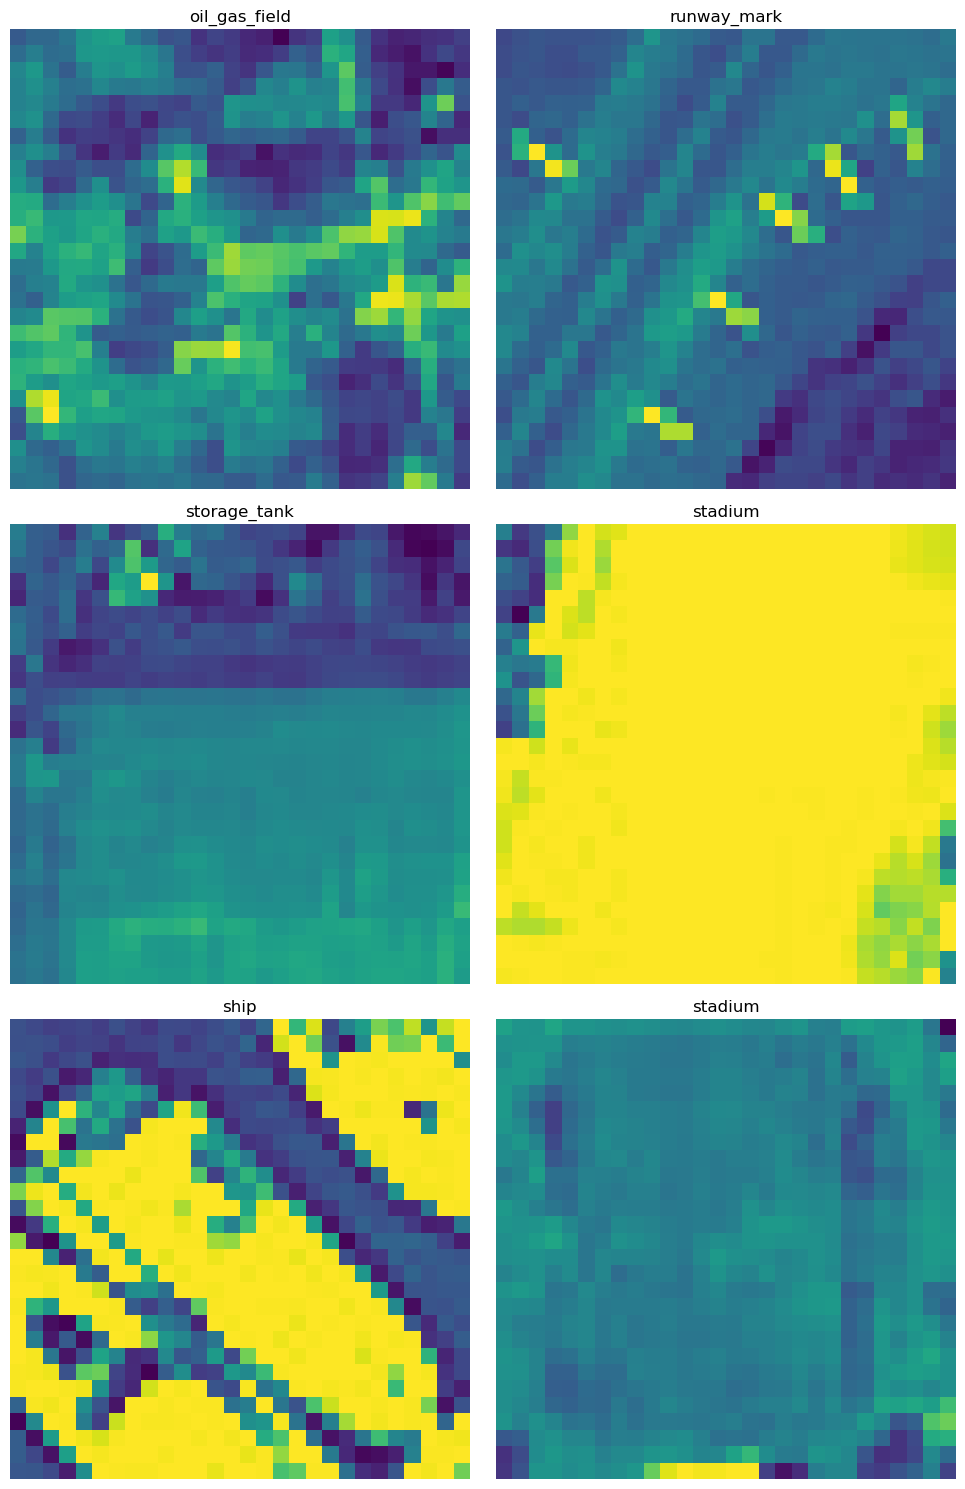

In [47]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 15)) # I adjusted figsize for improved visibility

label_names=["car","harbor","helicopter","oil_gas_field","parking_lot","plane","runway_mark","ship","stadium","storage_tank"]

for i in range(6):
    
    actual_label=int(y_test2[i][0])
    
    row = i // 2 # Integer division to get the row index
    
    col = i % 2  # Modulo to get the column index
    
    title = label_names[actual_label]
    
    ax[row, col].imshow(X_test[i].reshape(28, 28), cmap="viridis")
    
    ax[row, col].set_title(title)
    
    ax[row, col].axis('off') # I chose to hide the axis for a cleaner look

plt.tight_layout() # Adjust subplots to fit into the figure area.
plt.show()


#### Printing Perceptron Weights across Epochs

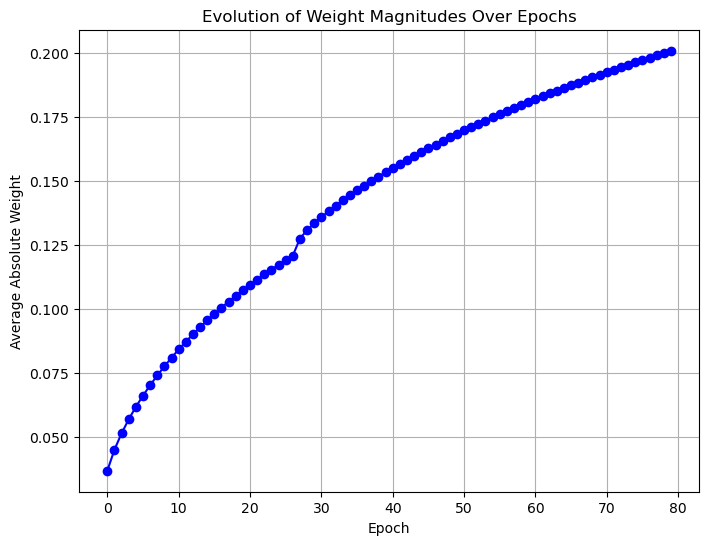

In [48]:
# Calculating the average absolute values of weights for each epoch to evaluate network performance

weights_magnitude = [np.abs(weights).mean() for weights in combined_perceptron_weights]

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(weights_magnitude, marker='o', linestyle='-', color='b')
plt.title('Evolution of Weight Magnitudes Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Average Absolute Weight')
plt.grid(True)
plt.show()


## Analysis

Analysis (step activation / online learning, step activation / full batch learning, sigmoid activation /
online learning, sigmoid activation / full batch learning) 

### Analyzing the step activation: online and  full batch learning

Analyzing the performance metrics and confusion matrices for both the online and batch learning implementations of a single-layer Perceptron with step activation reveals insightful distinctions in their capabilities and potential applications.

Firstly, the online learning Perceptron, which updates weights after each training example, achieved an accuracy of 92.88% with a precision of 98.67% and a recall of 94.06%. Its confusion matrix indicates that it correctly identified 7525 non-ship images (true negatives) and 388 ship images (true positives), while misclassifying 107 non-ship images as ships (false positives) and failing to recognize 500 ship images (false negatives).

In contrast, the batch learning approach, which accumulates weight updates across a batch of training examples before applying changes, resulted in a slightly lower accuracy of 92.28%. However, it exhibited a higher precision of 99.53% but a lower recall of 92.68%. This model correctly classified 7595 true negatives and 267 true positives but had fewer false positives (37) and more false negatives (621) compared to the online learning model.

The differences in performance can be attributed to how each model approaches learning. Online learning's iterative, example-by-example update mechanism allows it to adapt more dynamically to the data, potentially making it better suited for environments where data arrives sequentially or the model needs to adapt to new patterns over time. This could explain its slightly higher recall, indicating a better capability to identify relevant patterns (ships in this case) at the cost of a marginally increased rate of false positives.

Batch learning's more stable and less reactive update mechanism, on the other hand, yields higher precision, evidenced by its remarkable ability to minimize false positives. This suggests that batch learning might be more appropriate in applications where avoiding false alarms is critical, even if it means potentially missing more true positives, as indicated by its slightly lower recall.

Despite these differences, both models exhibit high precision, underscoring their effectiveness in correctly identifying ships when they predict one is present. However, the recall difference points towards a trade-off between sensitivity to detecting ships and the propensity to mislabel non-ship images as ships.

The choice between online and batch learning should therefore be guided by the specific requirements of the application environment. If adapting to new data continuously is crucial, and a higher false positive rate is acceptable, online learning provides a viable solution. Conversely, for applications where minimizing false positives is paramount, batch learning's conservative update strategy offers a compelling advantage.

In conclusion, while both models demonstrate strong performance, their subtle differences in precision and recall, alongside the trade-offs between adaptability and caution, highlight the importance of tailoring the learning approach to the specific needs of the task at hand.

### Analyzing the sigmoid activation: online and batch learning


Analyzing the performance of my Perceptron implementations with sigmoid activation reveals intriguing insights into the trade-offs between online and batch learning modes as well as the impact of activation functions on binary classification tasks.

For the online learning Perceptron, I observed an accuracy of 92.70%, precision of 99.36%, and recall of 93.26%. These results underscore the model's effectiveness in classifying data with high confidence (as evidenced by the near-perfect precision score), suggesting it's particularly adept at minimizing false positives; only 51 non-ship images were misclassified as ships. The recall score, while slightly lower, indicates a strong ability to identify relevant instances (ships), though it missed a more significant number of them (571) compared to false positives. This could suggest that while the model is conservative in its predictions (erring on the side of caution), it occasionally misses identifying ships, likely due to the varied and complex features associated with these images.

On the other hand, the batch learning approach with sigmoid activation yielded an accuracy of 89.87%, precision of 100%, and recall of 89.87%. The standout figure here is the precision score, which suggests that every image classified as a ship was indeed a ship, reflecting an exceptionally high specificity. However, this model exhibited a lower recall and accuracy compared to the online learning model, which could be attributed to its higher tendency to classify ships as non-ships, thus missing a substantial number of positive cases (863 missed ships).

The stark contrast in precision between the two models highlights the significant impact of learning mode on classification behavior. The online learning model's iterative, instance-by-instance update mechanism might better capture the variability within the "ship" class, thus balancing false positives and negatives more effectively. In contrast, the batch learning approach, which updates weights based on the aggregated errors over a batch, might be skewing the model towards avoiding false positives at the expense of misclassifying a higher number of ships as non-ships.

The higher recall of the online model versus the batch model suggests that the former is more sensitive to detecting positive instances, making it more suitable for applications where missing a positive instance (a ship, in this context) carries a higher cost. However, the batch model’s perfect precision could be more desirable in scenarios where the cost of a false positive is higher.

In conclusion, the choice between online and batch learning, especially with a sigmoid activation function, involves a trade-off between precision and recall. The online learning perceptron offers a balanced approach, making it versatile for varied applications, while the batch learning perceptron, with its impeccable precision, is ideal for situations where false positives must be minimized at all costs. This analysis underscores the importance of aligning the learning mode and activation function with the specific requirements of the classification task at hand.

### Comparing Sigmoid and Step functions performance

Comparing the performance of Perceptrons with sigmoid and step activations in online learning modes reveals distinct outcomes due to activation functions and learning strategies. The online learning Perceptron with step activation achieved an accuracy of 92.88%, precision of 98.67%, and recall of 94.06%, whereas its sigmoid counterpart posted an accuracy of 92.70%, precision of 99.36%, and recall of 93.26%. 

The slight edge in accuracy and recall for the step activation model suggests a marginally better overall performance in correctly identifying ships and minimizing misclassifications. However, the sigmoid activation model shines in precision, virtually eliminating false positives with a near-perfect precision score, indicative of its exceptional specificity in classifying ships accurately when it chooses to do so.

The difference in recall between the two models, albeit minor, points to the step activation's slightly better sensitivity in detecting positive instances. Meanwhile, the sigmoid model's superior precision demonstrates its strength in confidently asserting positive classifications with minimal error. This comparison underlines the trade-offs between sensitivity and specificity, influenced by the choice of activation function in online learning scenarios, highlighting the nuanced considerations required to optimize performance for specific task requirements.